<a href="https://colab.research.google.com/gist/renukacogent26/8825a5fe143da063db992772656d1d64/wine_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the python and scikit learn version
# importing visualization libraries

import sys
assert sys.version_info>=(3,5)

import sklearn
assert sklearn.__version__>="0.20"

import numpy as np

import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

In [3]:
# Creating images path 

PROJECT_ROOT_DIR="."
IMAGES_PATH=os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

In [4]:
# Saving the images with correct name and extension as "png" 

def save_fig(fig_id, resolution=300, tight_layout=True, file_extension="png"):
  path=os.path.join(IMAGES_PATH, fig_id+"."+file_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
# importing the dataset

from google.colab import files
upload=files.upload() 

Saving 1613779-Red_wine_.csv to 1613779-Red_wine_.csv


In [6]:
# Reading the dataset

import pandas as pd
import io

wine=pd.read_csv(io.BytesIO(upload["1613779-Red_wine_.csv"]))

In [7]:
# Reading the first five rows of DataFrame

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [8]:
# Understanding the rows and columns of dataset. There are 1599 rows and 12 columns in the dataset

wine.shape

(1599, 12)

In [9]:
# Understanding the target variable. Since the target variable ("quality") ranges between 3.0 and 8.0 this should be considered as categorical value 

wine['quality'].value_counts()

5.0    680
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [10]:
# Renaming the column head

wine=wine.rename(columns={"free sulfur dioxide": "freeSO2", "total sulfur dioxide": "totalSO2"})

In [11]:
# Using bins to categorize the target variable "quality" as "good" and "bad". We again changing the quality "good" as "1" and "bad" as "0"

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)

wine['quality']=wine['quality'].map({"bad" : 0, "good" : 1})


In [12]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,freeSO2,totalSO2,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [13]:
# Treating the missing values of target variable
# Changing the from decimal to integer  

wine['quality']=wine['quality'].fillna(1.0)

In [14]:
wine['quality']=wine['quality'].astype(int)

In [15]:
wine.isnull().sum()

fixed acidity       0
volatile acidity    0
citric acid         0
residual sugar      0
chlorides           0
freeSO2             0
totalSO2            1
density             0
pH                  1
sulphates           0
alcohol             0
quality             0
dtype: int64

In [16]:
# Replace the null values of independent columns with median 

wine['totalSO2']=wine['totalSO2'].fillna(wine['totalSO2'].median())
wine['pH']=wine['pH'].fillna(wine['pH'].median())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12e4214990>,
      dtype=object)

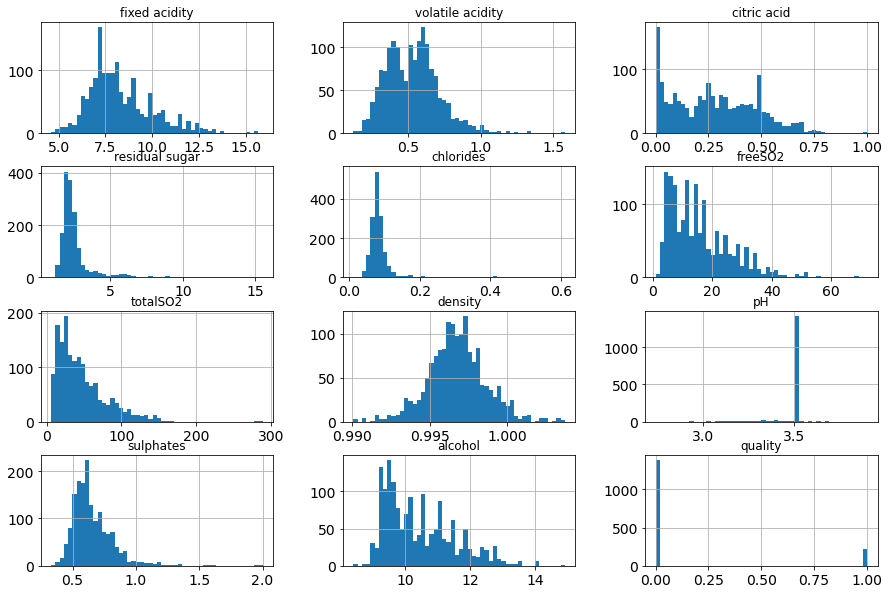

In [17]:
# Histogram plot of the dataset

wine.hist(bins=50, figsize=(15,10))

In [ ]:
# From the above histplot it is understood that pH value of maximum number of wines is 3.5
# Majority of the wine density lies around 1.0

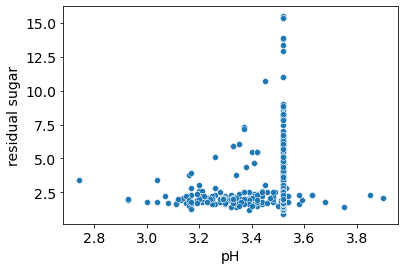

In [18]:
import seaborn as sns

sns.scatterplot(data=wine, x="pH", y="residual sugar")

In [ ]:
# Sugar levels are equally distributed at pH of 3.1 and 3.4 around 2.0 and 2.5
# At pH=3.5 the sugar level varies between 1.0 and 15.0

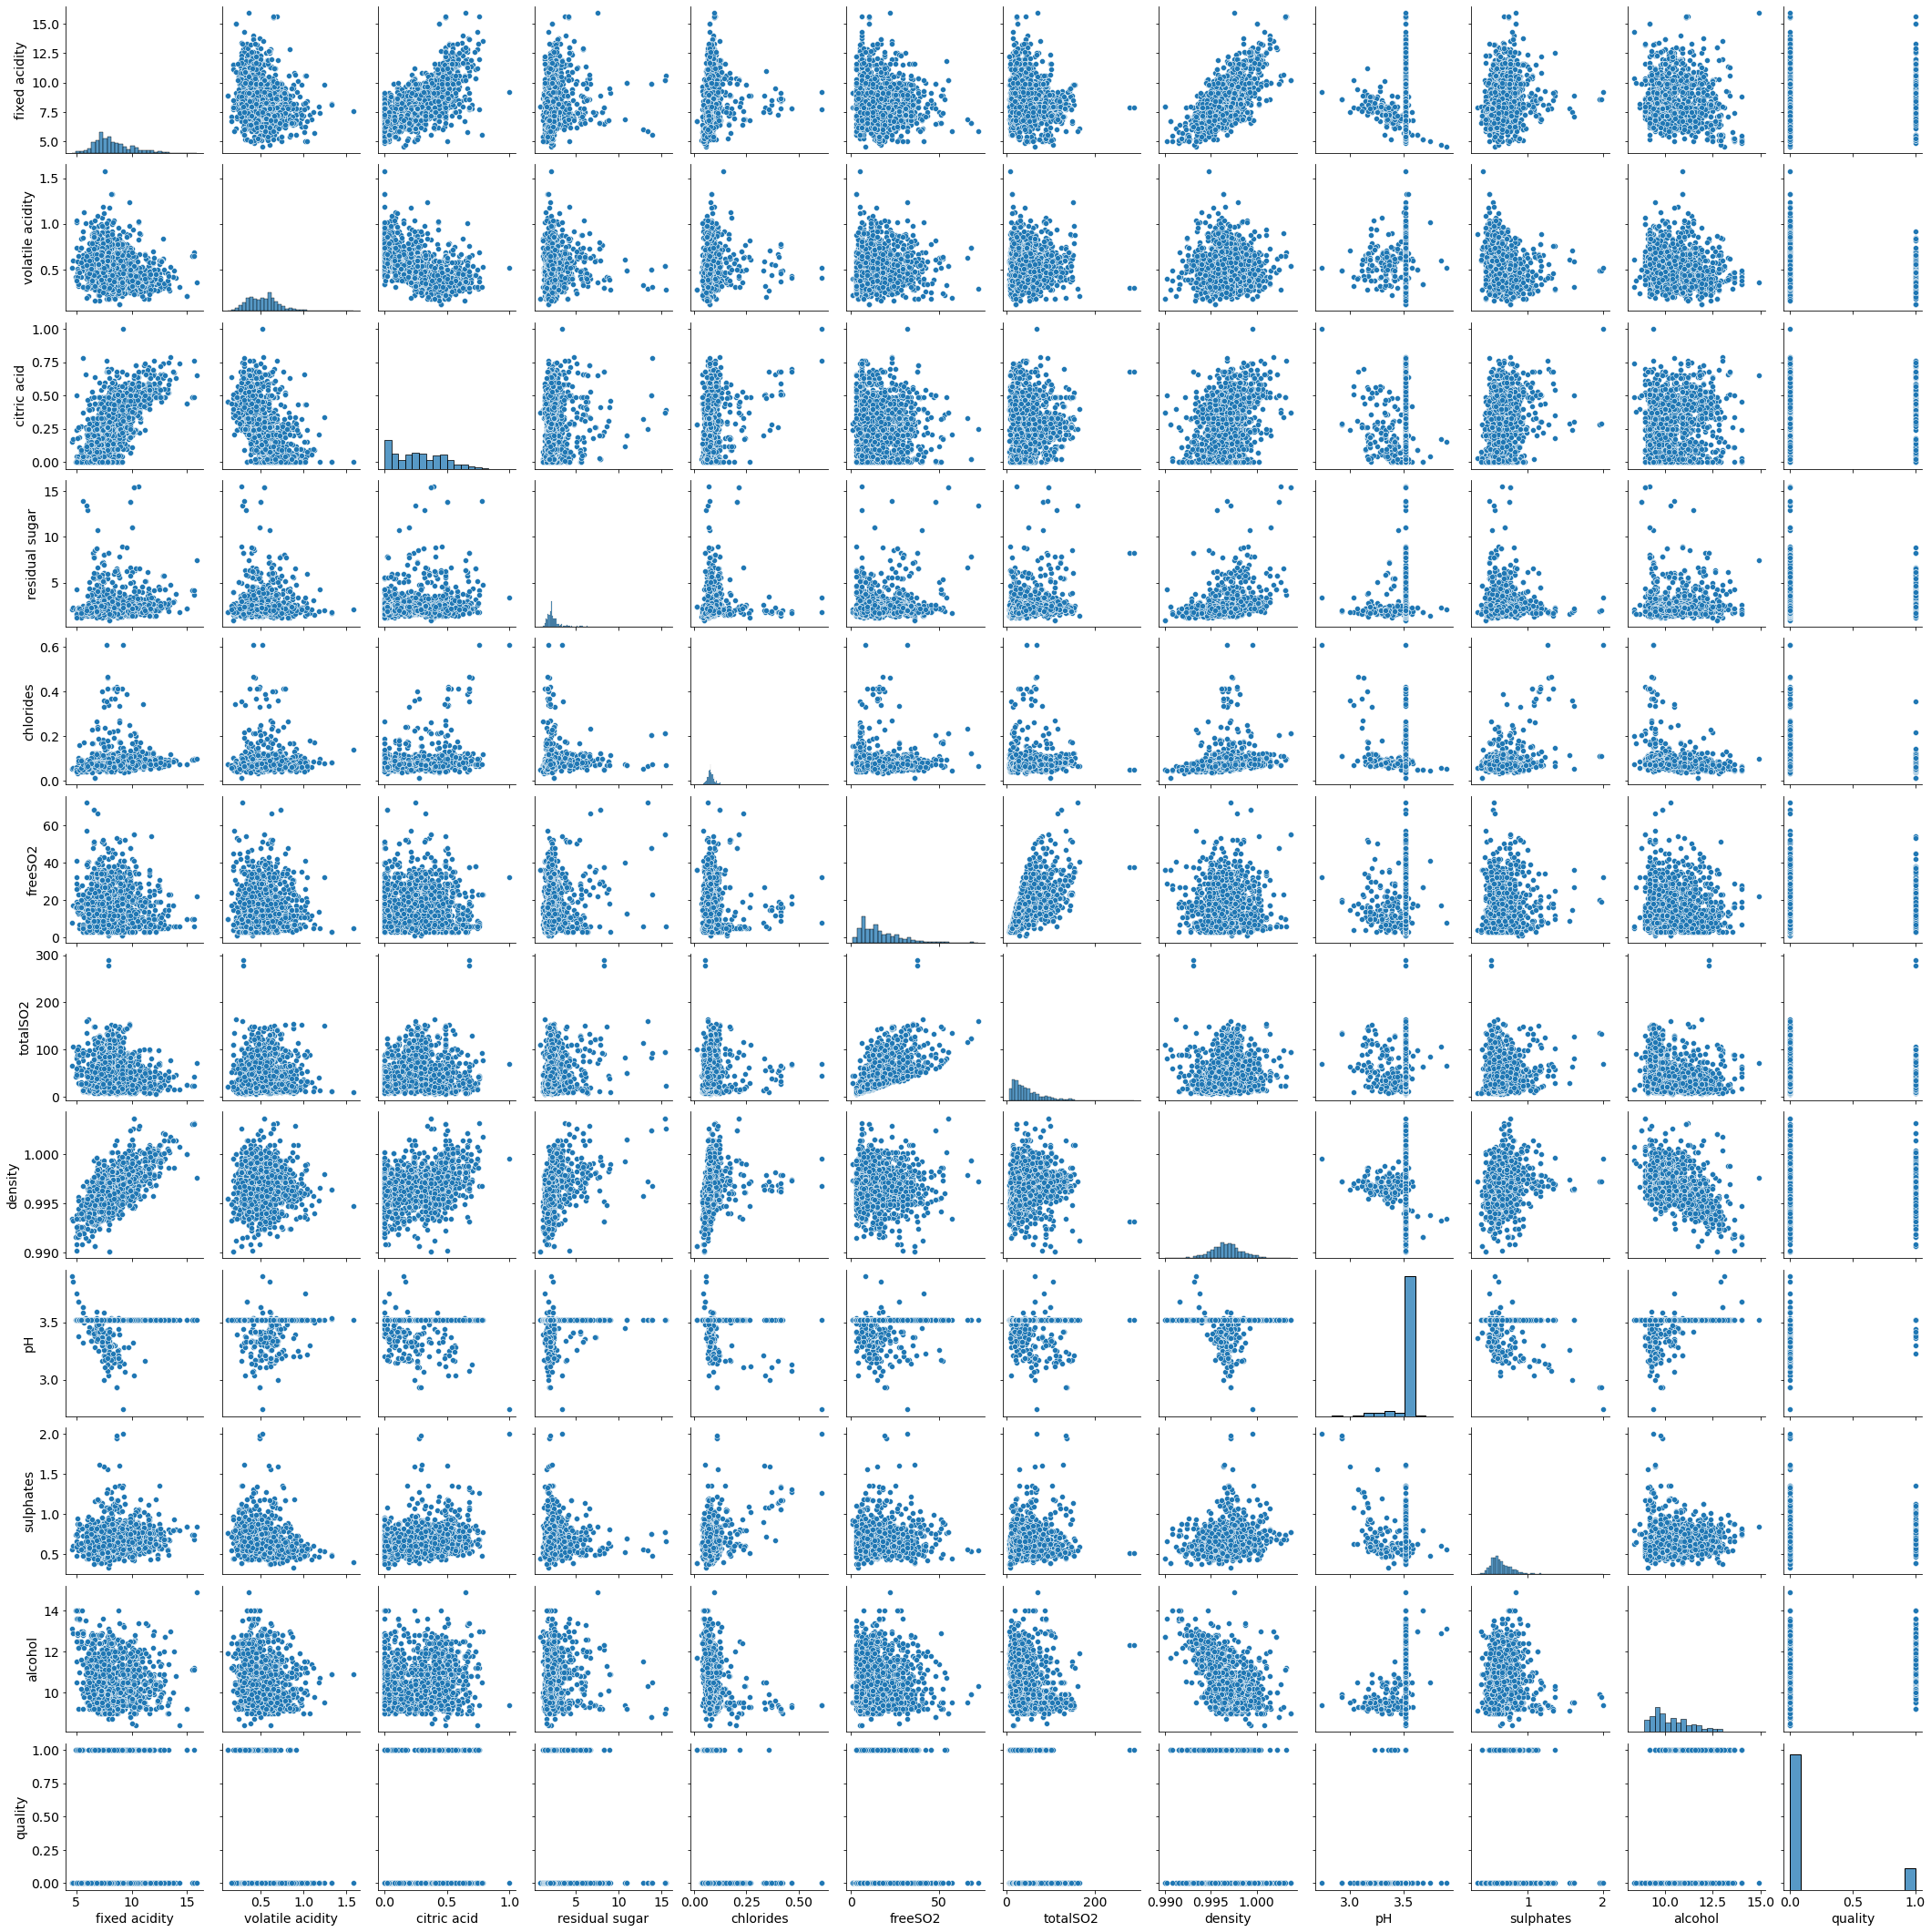

In [19]:
sns.pairplot(data=wine, diag_kind="hist")

In [ ]:
# From the plot, all the varaiables playing a major role in predicting the quality of wine

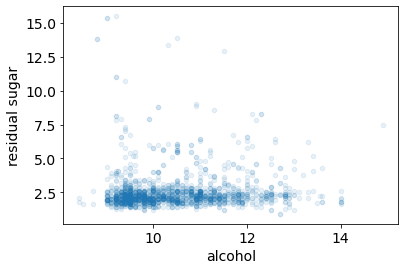

In [20]:
wine.plot(kind="scatter", x="alcohol", y='residual sugar', alpha=0.1)

In [21]:
# finding the variables that are positive correlation with target variable

corr_matrix=wine.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality             1.000000
alcohol             0.404948
citric acid         0.211764
sulphates           0.197721
fixed acidity       0.119494
pH                  0.080471
residual sugar      0.047766
freeSO2            -0.072458
chlorides          -0.097409
totalSO2           -0.139576
density            -0.149344
volatile acidity   -0.268333
Name: quality, dtype: float64

In [ ]:
# The quality of wine would be good if the contents 'alcohol','sulphates','citric acid','pH', 'fixed acidity' are high
# If the high content of volatile acidity this gives the bad quality of wine 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f12d7b4ad90>,
      dtype=object)

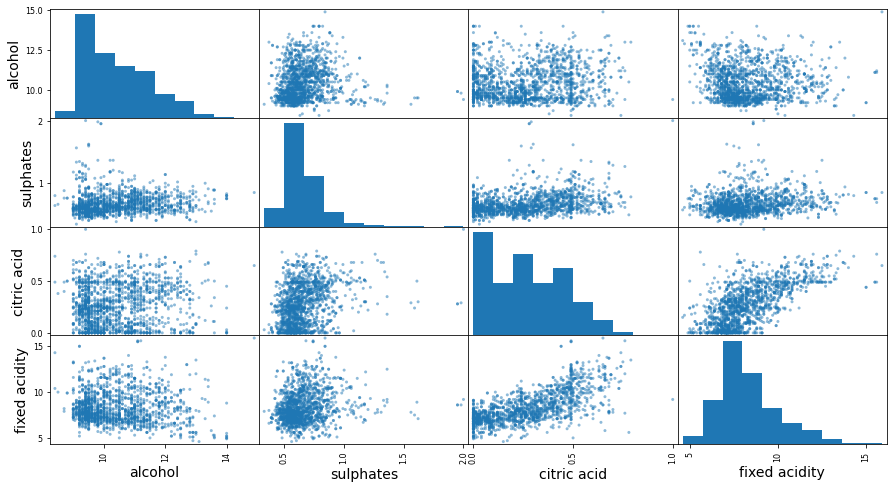

In [55]:
from pandas.plotting import scatter_matrix

attributes=['alcohol','sulphates','citric acid','fixed acidity']
scatter_matrix(wine[attributes], figsize=(15,8))

In [23]:
# Definig target and feature variables 

X=wine.drop(['quality'], axis=1)
y=wine['quality']

In [24]:
# Splitting the data for train and test model

from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [25]:
# Data normalization using StandardScaler method

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [26]:
# Finding the accuracy using Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree=DecisionTreeClassifier(random_state=42,criterion="gini", max_depth=2)
tree.fit(X_train,y_train)
y_pred=tree.predict(X_test)

score=accuracy_score(y_test, y_pred)
print(f"The accuracy score of decicion tree is", score)

The accuracy score of decicion tree is 0.859375


In [ ]:
# The accuray score of Decision Tree is 85.9%

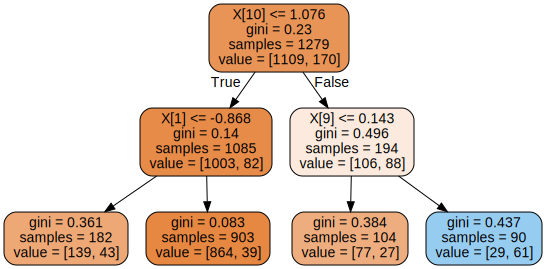

In [27]:
# Decision Tree Model of our dataset

from graphviz import Source
from sklearn.tree import export_graphviz

tree_clf=DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

export_graphviz(tree, out_file=os.path.join(IMAGES_PATH, "tree.dot"), rounded=True, filled=True)

Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

In [28]:
# Decision Tree using Bagging

from sklearn.ensemble import BaggingClassifier

bag_clf=BaggingClassifier(DecisionTreeClassifier(random_state=42),
                          n_estimators=500, max_samples=100,bootstrap=True, random_state=42)
bag_clf.fit(X_train, y_train)

y_pred=bag_clf.predict(X_test)

print(f"The accuracy score is", accuracy_score(y_test, y_pred))

The accuracy score is 0.85625


In [ ]:
# The accuray of Bagging Classifier is 85.6% which is equivalent to Decision Tree Classifier

In [29]:
# Using Logistics, Random Forest, Support Vector and Voting classifier to find the best accuracy
# Voting Classifier using "Hard" voting

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC


lg_clf=LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf=RandomForestClassifier(random_state=42)
svc_clf=SVC(gamma="scale", kernel="linear",random_state=42)

In [30]:
voting_clf=VotingClassifier(estimators=[('log', lg_clf), ('rnd', rnd_clf), ('SVC', svc_clf)], voting="hard")

In [31]:
from sklearn.metrics import accuracy_score

for clf in (lg_clf, rnd_clf, svc_clf, voting_clf):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.871875
RandomForestClassifier 0.890625
SVC 0.85
VotingClassifier 0.871875


In [ ]:
# The accuracy score of Logistics, Random Forest, Support Vector and Voting Classifier is 87%, 89%, 85% and 87%, respectively
# Random Forest has the highest accuracy among all 

In [32]:
# Voting Classifier using "Soft" voting

lg_clf_soft=LogisticRegression(solver='lbfgs',random_state=42)
rnd_clf_soft=RandomForestClassifier(random_state=42)
svc_clf_soft=SVC(gamma="scale", kernel="linear", probability=True, random_state=42)

voting_clf_soft=VotingClassifier(estimators=[('log', lg_clf_soft), ('rnd', rnd_clf_soft), ('SVC', svc_clf_soft)], voting="soft")

for clf in (lg_clf_soft, rnd_clf_soft, svc_clf_soft, voting_clf_soft):
  clf.fit(X_train,y_train)
  y_pred=clf.predict(X_test)
  print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.871875
RandomForestClassifier 0.890625
SVC 0.85
VotingClassifier 0.85625


In [ ]:
# The accuracy score of Logistics, Random Forest, Support Vector and Voting Classifier is 87%, 89%, 85% and 85%, respectively.
# The accuracy of Voting classifier tends to be reduced for Soft Voting Classifier 

In [56]:
# Finetuning the hyperparameters using GridSearch
# For Random Forest Model

from sklearn.model_selection import GridSearchCV

params={"n_estimators": [100,200, 300, 400, 500],
    "max_depth": [2, 8]}

In [57]:
grid_rnd=GridSearchCV(estimator=rnd_clf, param_grid=params, verbose=3, cv=5, n_jobs=-1)
grid_rnd

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 8],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [58]:
grid_rnd.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 8],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=3)

In [59]:
pd.DataFrame(grid_rnd.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.245857,0.074927,0.018686,0.005106,2,100,"{'max_depth': 2, 'n_estimators': 100}",0.878906,0.867188,0.867188,0.867188,0.870588,0.870211,0.004543,6
1,0.357453,0.013264,0.027342,0.000437,2,200,"{'max_depth': 2, 'n_estimators': 200}",0.878906,0.867188,0.867188,0.867188,0.866667,0.869427,0.004744,7
2,0.519186,0.012406,0.042963,0.003559,2,300,"{'max_depth': 2, 'n_estimators': 300}",0.878906,0.867188,0.867188,0.867188,0.866667,0.869427,0.004744,7
3,0.908733,0.226643,0.082803,0.028442,2,400,"{'max_depth': 2, 'n_estimators': 400}",0.878906,0.867188,0.867188,0.867188,0.866667,0.869427,0.004744,7
4,0.869423,0.040610,0.067859,0.004814,2,500,"{'max_depth': 2, 'n_estimators': 500}",0.878906,0.867188,0.867188,0.867188,0.866667,0.869427,0.004744,7
5,0.233155,0.007754,0.014723,0.000365,8,100,"{'max_depth': 8, 'n_estimators': 100}",0.878906,0.902344,0.871094,0.910156,0.917647,0.896029,0.018010,2
6,0.475334,0.008389,0.029153,0.000370,8,200,"{'max_depth': 8, 'n_estimators': 200}",0.878906,0.906250,0.871094,0.910156,0.909804,0.895242,0.016767,4
7,0.714440,0.017953,0.045587,0.005721,8,300,"{'max_depth': 8, 'n_estimators': 300}",0.878906,0.906250,0.871094,0.910156,0.913725,0.896026,0.017505,3
8,0.996938,0.125837,0.092936,0.070299,8,400,"{'max_depth': 8, 'n_estimators': 400}",0.878906,0.910156,0.871094,0.910156,0.905882,0.895239,0.016781,5
9,1.777896,0.643226,0.091204,0.020708,8,500,"{'max_depth': 8, 'n_estimators': 500}",0.878906,0.910156,0.871094,0.917969,0.905882,0.896801,0.018385,1


In [60]:
print(grid_rnd.best_params_)
print(grid_rnd.best_score_)
print(grid_rnd.best_estimator_)

{'max_depth': 8, 'n_estimators': 500}
0.8968014705882353
RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)


In [61]:
grid_rnd_clf=RandomForestClassifier(random_state=42, **grid_rnd.best_params_)
grid_rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=500, random_state=42)

In [62]:
grid_rnd_clf.score(X_test, y_test)

0.86875

In [ ]:
# The accuracy of Random Forest Model after using GridSearch is 86.8% which is lesser than the previous model (89%) 

In [40]:
# GridSearch for SVC Model

params_svc={
    "C":[0.1,  0.4,  0.7, 1.0, 1.3, 1.5],
    "kernel":['linear', 'rbf'],
    "gamma": [0.001, 0.01, 0.1, 1, 1.1]
    }

In [41]:
grid_svc=GridSearchCV(estimator=svc_clf, param_grid=params_svc, cv=5, scoring="accuracy")
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.1, 0.4, 0.7, 1.0, 1.3, 1.5],
                         'gamma': [0.001, 0.01, 0.1, 1, 1.1],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [42]:
pd.DataFrame(grid_svc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008859,0.002855,0.001680,0.000082,0.1,0.001,linear,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
1,0.011815,0.000138,0.004106,0.000062,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
2,0.008345,0.001279,0.002235,0.000664,0.1,0.01,linear,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
3,0.012838,0.000427,0.004230,0.000062,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
4,0.008090,0.002067,0.002061,0.000420,0.1,0.1,linear,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
5,0.015215,0.000611,0.005392,0.000743,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
6,0.007647,0.001241,0.001757,0.000049,0.1,1,linear,"{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
7,0.031527,0.002142,0.010447,0.000371,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
8,0.007978,0.001426,0.001965,0.000439,0.1,1.1,linear,"{'C': 0.1, 'gamma': 1.1, 'kernel': 'linear'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16
9,0.031512,0.001523,0.010730,0.000622,0.1,1.1,rbf,"{'C': 0.1, 'gamma': 1.1, 'kernel': 'rbf'}",0.867188,0.867188,0.867188,0.867188,0.866667,0.867083,0.000208,16


In [43]:
print(grid_svc.best_params_)
print(grid_svc.best_score_)

{'C': 1.3, 'gamma': 1.1, 'kernel': 'rbf'}
0.8991482843137255


In [44]:
grid_svc_clf=SVC(random_state=42,**grid_svc.best_params_)
grid_svc_clf.fit(X_train,y_train)

SVC(C=1.3, gamma=1.1, random_state=42)

In [47]:
print("SVC accuracy score after GridSearch", grid_svc_clf.score(X_test,y_test))

SVC accuracy score after GridSearch 0.89375


In [ ]:
# The accuracy of SVC Model after using GridSearch is has been increased from 85% to 89%

In [54]:
# Increasing the accuracy of Random Forest Model using Cross Validation Score 

from sklearn.model_selection import cross_val_score

rnf_clf_cvs=cross_val_score( estimator=rnd_clf, X=X_train,y=y_train, cv=5)
rnf_clf_cvs.mean()

0.9053952205882354

In [63]:
# The accuracy of Random Forest Model after using Cross Validation Score has been increased from 89% to 90%. 